# Task 2: Predictive modeling of customer bookings

---

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

## 1. Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

## Further EDA

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [9]:
df.shape

(50000, 14)

In [10]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

There are no missing values in the data.

In [11]:
df.drop_duplicates()
df.shape

(50000, 14)

Since no rows have been dropped, that means our data does not contain any duplicate entries.

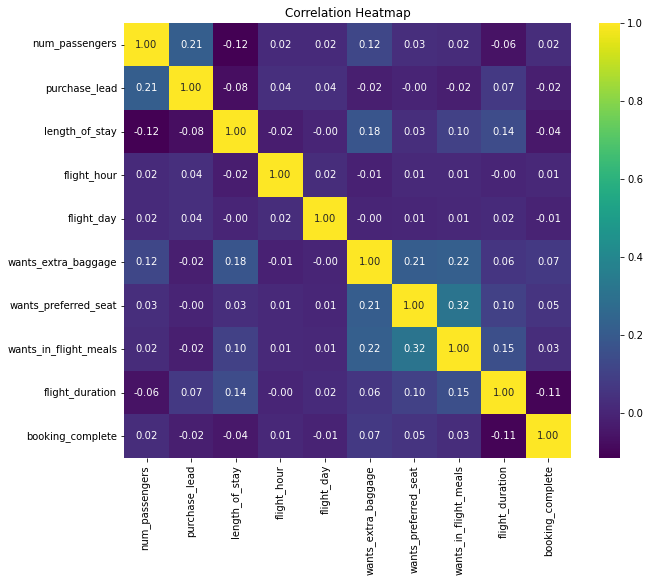

In [12]:
#Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

There are no strong correlations among the numerical features. However, it seems that there is a weak positive correlation between passengers that want extra baggage, those that want in-flight meals and those that want a preferred seat in the booking.

### Exploring the categorical variables

In [13]:
palette = sns.color_palette('viridis')
palette.as_hex()

['#46327e', '#365c8d', '#277f8e', '#1fa187', '#4ac16d', '#a0da39']

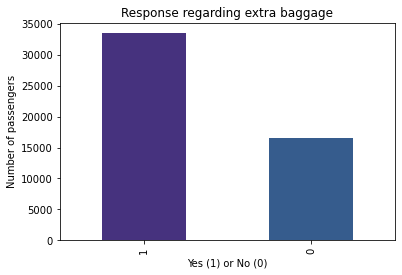

In [14]:
x = df['wants_extra_baggage'].value_counts()

x.plot(kind='bar', color=palette)
plt.xlabel('Yes (1) or No (0)')
plt.ylabel('Number of passengers')
plt.title('Response regarding extra baggage')
plt.show()

More customers wanted to have extra baggage in the booking.

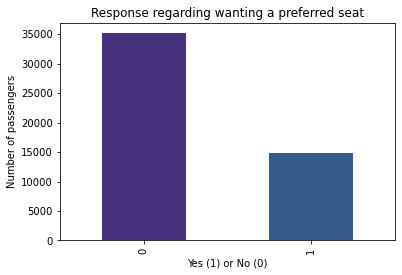

In [15]:
y = df['wants_preferred_seat'].value_counts()

y.plot(kind='bar', color=palette)
plt.xlabel('Yes (1) or No (0)')
plt.ylabel('Number of passengers')
plt.title('Response regarding wanting a preferred seat')
plt.show()

Customers were happy with the seat they received in the booking and less of them wanted a preferred seat.

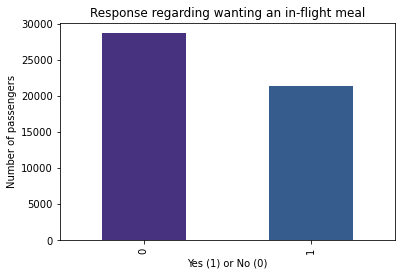

In [16]:
z = df['wants_in_flight_meals'].value_counts()

z.plot(kind='bar', color=palette)
plt.xlabel('Yes (1) or No (0)')
plt.ylabel('Number of passengers')
plt.title('Response regarding wanting an in-flight meal')
plt.show()

Less customers wanted an in-flight meal.

Let us understand customer preferences when flight durations are different.

In [17]:
print("Min:",min(df['flight_duration']),"| Max:", max(df['flight_duration']))

Min: 4.67 | Max: 9.5


In [18]:
#bins for flight duration buckets
bins = [4, 6, 8, float('inf')]
labels = ['4 to 6 hours', '6 to 8 hours', '8+ hours']

In [19]:
df['flight_duration_bucket'] = pd.cut(df['flight_duration'], bins=bins, labels=labels, right=False)

In [20]:
df['flight_duration_bucket'].value_counts()

8+ hours        22640
6 to 8 hours    14081
4 to 6 hours    13279
Name: flight_duration_bucket, dtype: int64

More passengers are taking longer flights (8+ hours) than those taking short duration flights.

In [21]:
total_counts = df['flight_duration_bucket'].value_counts()

In [22]:
baggage_counts = df[df['wants_extra_baggage'] == 1].groupby('flight_duration_bucket')['flight_duration_bucket'].count()
mypercent = (baggage_counts/total_counts)*100

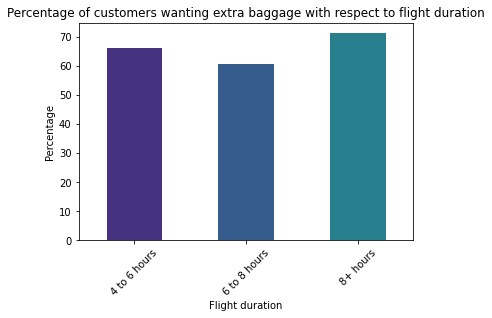

In [23]:
mypercent.plot(kind='bar', color=palette)
plt.xlabel('Flight duration')
plt.ylabel('Percentage')
plt.title('Percentage of customers wanting extra baggage with respect to flight duration')
plt.xticks(rotation=45)
plt.show()

There is no trend with respect to flight duration - irrespective of the duration of the flight, 60% or more customers want extra baggage allowance in their booking.

In [24]:
preferred_seat_counts = df[df['wants_preferred_seat'] == 1].groupby('flight_duration_bucket')['flight_duration_bucket'].count()
mypercent2 = (preferred_seat_counts / total_counts) * 100

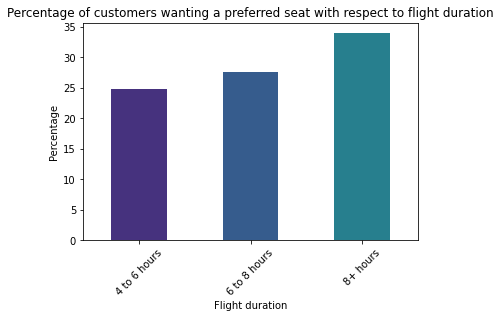

In [25]:
mypercent2.plot(kind='bar', color=palette)
plt.xlabel('Flight duration')
plt.ylabel('Percentage')
plt.title('Percentage of customers wanting a preferred seat with respect to flight duration')
plt.xticks(rotation=45)
plt.show()

As evident from the plot, more passengers want a preferred seat when the flight duration is longer. However, always, less than 35% of the passengers want this service irrespective of the flight duration.

In [26]:
inflight_meal_counts = df[df['wants_in_flight_meals'] == 1].groupby('flight_duration_bucket')['flight_duration_bucket'].count()
mypercent3 = (inflight_meal_counts / total_counts) * 100

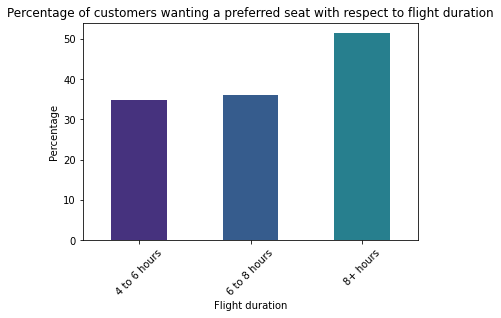

In [27]:
mypercent3.plot(kind='bar', color=palette)
plt.xlabel('Flight duration')
plt.ylabel('Percentage')
plt.title('Percentage of customers wanting a preferred seat with respect to flight duration')
plt.xticks(rotation=45)
plt.show()

More passengers want an in-flight meal when the flight duration is longer.

# 2. Modelling

Our objective is to model whether or not a customer would make a booking.

In [28]:
df['booking_complete'].value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

Since our target variable is categorical, we will opt for a classification model.

## 2.1 Dealing with class imbalance using SMOTE

In [29]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [30]:
#Preprocessing the numerical and categorical variables before model building
categorical_cols = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']
numeric_cols = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 
                'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 
                'flight_duration']

preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numeric_cols),
                                               ('cat', OneHotEncoder(drop='first'), categorical_cols)])

In [31]:
#features
x = df.drop(columns=['booking_complete'])
x_preprocessed = preprocessor.fit_transform(x)

#target
y = df['booking_complete']

In [33]:
#Train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_preprocessed, y, test_size=0.2, random_state=42)

In [34]:
x_train.shape

(40000, 918)

In [35]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
xtrain_resampled, ytrain_resampled = smote.fit_resample(x_train, y_train)

In [36]:
xtrain_resampled.shape

(68004, 918)

## 2.2 Baseline model - Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [38]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(xtrain_resampled, ytrain_resampled)

LogisticRegression(random_state=42)

In [39]:
ypred_lr = lr_model.predict(x_test)

In [40]:
accuracy_lr = accuracy_score(y_test, ypred_lr)
print(f"Accuracy: {accuracy_lr:.2f}")

Accuracy: 0.72


We have obtained an accuracy of 72% with our logistic regression model. Let us understand the model performance in more depth.

In [41]:
print("Classification Report:")
print(classification_report(y_test, ypred_lr))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.72      0.81      8520
           1       0.30      0.71      0.42      1480

    accuracy                           0.72     10000
   macro avg       0.62      0.71      0.62     10000
weighted avg       0.84      0.72      0.75     10000



In [42]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, ypred_lr))

Confusion Matrix:
[[6111 2409]
 [ 434 1046]]


The precision for class 1 (booking complete) is 0.30, indicating that among all instances predicted as class 1, only 30% of them are actually of this class.

## 2.3 Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(xtrain_resampled, ytrain_resampled)

RandomForestClassifier(random_state=42)

In [45]:
ypred_rf = rf_model.predict(x_test)

In [46]:
accuracy_rf = accuracy_score(y_test, ypred_rf)
print(f"Accuracy: {accuracy_rf:.2f}")

Accuracy: 0.85


In [47]:
print("Classification Report:")
print(classification_report(y_test, ypred_rf))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      8520
           1       0.45      0.23      0.30      1480

    accuracy                           0.85     10000
   macro avg       0.67      0.59      0.61     10000
weighted avg       0.81      0.85      0.82     10000



In [48]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, ypred_rf))

Confusion Matrix:
[[8121  399]
 [1147  333]]


The random forest classifier has an overall accuracy of 85%, performing better than the logistic regression. However, although precision has improved, the recall and F1 score for class 1 are quite low.

## 2.4 Gradient boosting

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(xtrain_resampled, ytrain_resampled)

GradientBoostingClassifier(random_state=42)

In [51]:
ypred_gb = gb_model.predict(x_test)

In [52]:
accuracy_gb = accuracy_score(y_test, ypred_gb)
print(f"Accuracy: {accuracy_gb:.2f}")

Accuracy: 0.80


In [53]:
print("Classification Report:")
print(classification_report(y_test, ypred_gb))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      8520
           1       0.35      0.37      0.36      1480

    accuracy                           0.80     10000
   macro avg       0.62      0.63      0.62     10000
weighted avg       0.81      0.80      0.81     10000



In [54]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, ypred_gb))

Confusion Matrix:
[[7497 1023]
 [ 930  550]]


The random forest classifier is giving a better accuracy overall, but the F1 score for the gradient boost model is slightly better in case of the minority class.

## 2.5 XGBoost

In [55]:
import xgboost as xgb

In [56]:
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(xtrain_resampled, ytrain_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [57]:
ypred_xgb = xgb_model.predict(x_test)
accuracy_xgb = accuracy_score(y_test, ypred_xgb)
print(f"Accuracy: {accuracy_xgb:.2f}")

Accuracy: 0.85


In [58]:
print("Classification Report:")
print(classification_report(y_test, ypred_xgb))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      8520
           1       0.45      0.19      0.27      1480

    accuracy                           0.85     10000
   macro avg       0.66      0.58      0.59     10000
weighted avg       0.81      0.85      0.82     10000



In [59]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, ypred_xgb))

Confusion Matrix:
[[8183  337]
 [1199  281]]


XGBoost (Extreme gradient boost) gives the same overall accuracy as the random forest classifier (85%), but the performance is worse for the minority class.

## 2.6 K Nearest Neighbours

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
knn_model = KNeighborsClassifier()
knn_model.fit(xtrain_resampled, ytrain_resampled)

KNeighborsClassifier()

In [62]:
ypred_knn = knn_model.predict(x_test)
accuracy_knn = accuracy_score(y_test, ypred_knn)
print(f"Accuracy: {accuracy_knn:.2f}")

Accuracy: 0.61


In [63]:
print("Classification Report:")
print(classification_report(y_test, ypred_knn))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.60      0.72      8520
           1       0.22      0.67      0.34      1480

    accuracy                           0.61     10000
   macro avg       0.57      0.63      0.53     10000
weighted avg       0.81      0.61      0.67     10000



In [64]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, ypred_knn))

Confusion Matrix:
[[5091 3429]
 [ 486  994]]


The KNN model doesn not perform well for our data compared to our other models.

# 3. Choice of model

The Random Forest model and the XGBoost both have the highest overall accuracy of 85%.

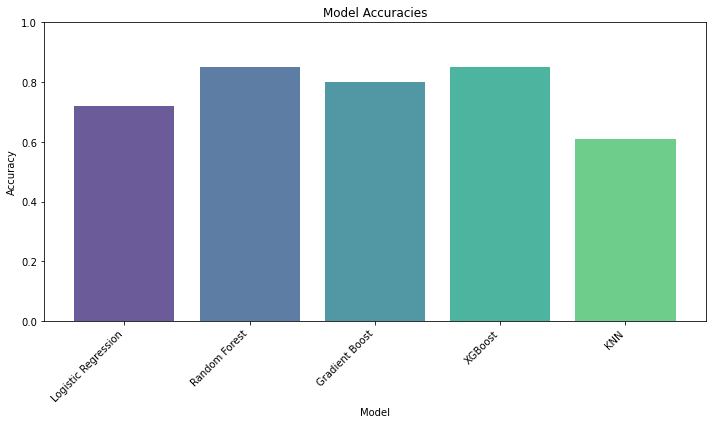

In [65]:
models = ['Logistic Regression', 'Random Forest', 'Gradient Boost', 'XGBoost', 'KNN']
accuracies = [0.72, 0.85, 0.80, 0.85, 0.61]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=palette, alpha=0.8)
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

Regarding other metrics:

In [66]:
metrics = ['Precision', 'Recall', 'F1-score']

precision = np.array([[0.93, 0.88, 0.89, 0.87, 0.91],  
                      [0.30, 0.45, 0.35, 0.45, 0.22]])

recall = np.array([[0.72, 0.95, 0.88, 0.96, 0.60],  
                   [0.71, 0.23, 0.37, 0.19, 0.67]])

f1_score = np.array([[0.81, 0.91, 0.88, 0.91, 0.72],
                     [0.42, 0.30, 0.36, 0.27, 0.34]])

#mean precision, recall and F1-score
mean_precision = np.mean(precision, axis=0)
mean_recall = np.mean(recall, axis=0)
mean_f1_score = np.mean(f1_score, axis=0)

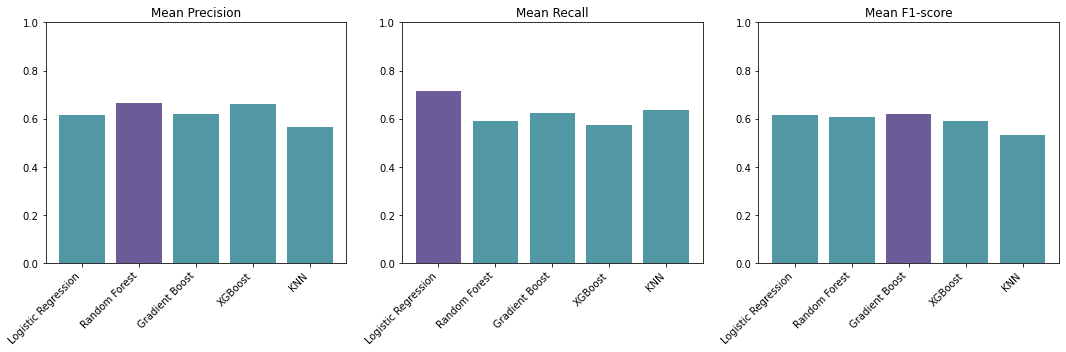

In [67]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for j, metric in enumerate(metrics):  # looping through metrics
    data = mean_precision if j == 0 else (mean_recall if j == 1 else mean_f1_score)
    best_index = np.argmax(data)  # index of the best-performing model
    best_value = data[best_index]  # value of the best-performing model
    
    for k, val in enumerate(data):
        if val == best_value:
            axs[j].bar(models[k], val, color=palette[0], alpha=0.8)
        else:
            axs[j].bar(models[k], val, color=palette[2], alpha=0.8) 
                
    axs[j].set_title('Mean {}'.format(metric))
    axs[j].set_xticklabels(models, rotation=45, ha='right')
    axs[j].set_ylim(0, 1) 

plt.tight_layout()
plt.show()

Since accuracy and mean precision is highest for the random forest model, we can go ahead with this model for more in-depth analysis.

# 4 Predictive Modelling - Random Forest Classifier

In [68]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder

In [69]:
# Separate features and target variable
X = df.drop(columns=['booking_complete'])
X_encoded = pd.get_dummies(X)

y = df['booking_complete']

In [70]:
X_encoded.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Internet,...,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam,flight_duration_bucket_4 to 6 hours,flight_duration_bucket_6 to 8 hours,flight_duration_bucket_8+ hours
0,2,262,19,7,6,1,0,0,5.52,1,...,0,0,0,0,0,0,0,1,0,0
1,1,112,20,3,6,0,0,0,5.52,1,...,0,0,0,0,0,0,0,1,0,0
2,2,243,22,17,3,1,1,0,5.52,1,...,0,0,0,0,0,0,0,1,0,0
3,1,96,31,4,6,0,0,1,5.52,1,...,0,0,0,0,0,0,0,1,0,0
4,2,68,22,15,3,1,0,1,5.52,1,...,0,0,0,0,0,0,0,1,0,0


## 4.1 Cross Validation

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rf_classifier = RandomForestClassifier(random_state=42)

In [73]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [74]:
cv_scores = cross_val_score(rf_classifier, X_encoded, y, cv=cv, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

Cross-validation scores: [0.8522 0.8492 0.8535 0.8513 0.849 ]
Mean CV accuracy: 0.85104


The cross-validation scores are fairly consistent, with an average accuracy of approximately 85.10%. This suggests that the model is performing consistently across different folds of the data.

Let us check other metrics too, such as precision, recall and F1 score.

In [75]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_scores = []
recall_scores = []
f1_scores = []

#Train and evaluate the model on each fold separately to get precision, recall, and F1 scores
for train_index, test_index in cv.split(X_encoded, y):
    X_train, X_test = X_encoded.iloc[train_index], X_encoded.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    
    #precision, recall, and F1 score for class 0
    p0 = precision_score(y_test, y_pred, pos_label=0)
    r0 = recall_score(y_test, y_pred, pos_label=0)
    f0 = f1_score(y_test, y_pred, pos_label=0)
    
    #precision, recall, and F1 score for class 1
    p1 = precision_score(y_test, y_pred, pos_label=1)
    r1 = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    
    precision_scores.append((p0, p1))
    recall_scores.append((r0, r1))
    f1_scores.append((f0, f1))

In [76]:
# Compute the mean precision, recall, and F1 score for each class
mean_p0 = sum(p[0] for p in precision_scores) / len(precision_scores)
mean_p1 = sum(p[1] for p in precision_scores) / len(precision_scores)

mean_r0 = sum(r[0] for r in recall_scores) / len(recall_scores)
mean_r1 = sum(r[1] for r in recall_scores) / len(recall_scores)

mean_f0 = sum(f[0] for f in f1_scores) / len(f1_scores)
mean_f1 = sum(f[1] for f in f1_scores) / len(f1_scores)

print("Mean Precision for class 0:", mean_p0)
print("Mean Precision for class 1:", mean_p1)
print("Mean Recall for class 0:", mean_r0)
print("Mean Recall for class 1:", mean_r1)
print("Mean F1 Score for class 0:", mean_f0)
print("Mean F1 Score for class 1:", mean_f1)

Mean Precision for class 0: 0.8657514760641718
Mean Precision for class 1: 0.5073952145602464
Mean Recall for class 0: 0.976224062764253
Mean Recall for class 1: 0.13920733997460338
Mean F1 Score for class 0: 0.917674220148163
Mean F1 Score for class 1: 0.21840785551932443


These results indicate that the model performs well for class 0 but struggles to predict for class 1, even after dealing with class imbalance. 

## 4.2 Feature Importance Analysis

In [77]:
original_features = ['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead', 'length_of_stay', 'flight_hour', 
                'flight_day', 'route', 'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 
                'flight_duration']

In [78]:
rf_classifier.fit(X_encoded, y)

RandomForestClassifier(random_state=42)

In [90]:
#feature importances from the trained RandomForestClassifier
importances = rf_classifier.feature_importances_

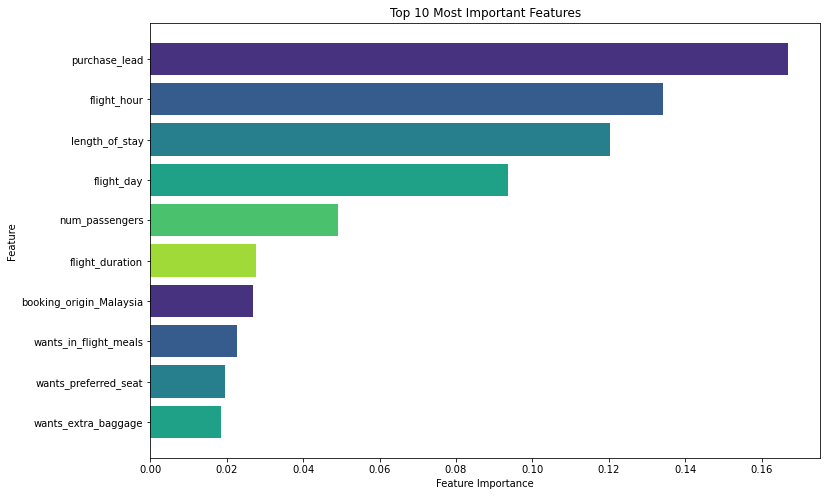

In [95]:
top_indices = importances.argsort()[-10:][::-1]
top_importances = importances[top_indices]
top_feature_names = X_encoded.columns[top_indices]

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(range(10), top_importances, align='center', color=palette)
plt.yticks(range(10), top_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features at the top
plt.show()

The 3 most important features are:

1. purchase_lead = number of days between travel date and booking date
2. flight_hour = hour of flight departure
3. length_of_stay = number of days spent at destination

This concludes our analysis (a summary of the key findings can be found in the powerpoint deck attached in the rp